In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

num_cols, cat_cols

(['age',
  'hypertension',
  'heart_disease',
  'bmi',
  'HbA1c_level',
  'blood_glucose_level',
  'diabetes'],
 ['gender', 'smoking_history'])

In [6]:
df.duplicated().sum()   

np.int64(3854)

In [7]:
df = df.drop_duplicates()

df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [10]:
df['smoking_history'] = df['smoking_history'].replace('No Info', np.nan)

df['smoking_history'] = df['smoking_history'].fillna(df['smoking_history'].mode()[0])

df['smoking_history'].value_counts()

smoking_history
never          67285
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [11]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [12]:
df['gender'] = df['gender'].map({'Female':0, 'Male':1, 'Other':np.nan})
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

df['gender'].value_counts()

gender
0.0    56179
1.0    39967
Name: count, dtype: int64

In [13]:
df['age_group'] = df['age'].apply(lambda x: 'Young' if x < 30 else('Middle-aged' if x < 60 else 'Old'))

df['age_group'].value_counts()

age_group
Middle-aged    40997
Young          31174
Old            23975
Name: count, dtype: int64

In [14]:
df['bmi_group'] = df['bmi'].apply(
    lambda x: 'Underweight' if x < 18.5 else ('Normal' if x < 25 else('Overweight' if x < 30 else 'Obese')))

df['bmi_group'].value_counts()

bmi_group
Overweight     41917
Obese          23530
Normal         22208
Underweight     8491
Name: count, dtype: int64

In [15]:
df['Comorbidity'] = (df['hypertension']+ df['heart_disease']) >  0

df['Comorbidity']

0         True
1        False
2        False
3        False
4         True
         ...  
99994    False
99996    False
99997    False
99998    False
99999    False
Name: Comorbidity, Length: 96146, dtype: bool

In [16]:
df = pd.get_dummies(df, columns=['smoking_history',  'age_group', 'bmi_group'], drop_first=True)

df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Comorbidity,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,age_group_Old,age_group_Young,bmi_group_Obese,bmi_group_Overweight,bmi_group_Underweight
0,0.0,80.0,0,1,25.19,6.6,140,0,True,False,False,True,False,True,False,False,True,False
1,0.0,54.0,0,0,27.32,6.6,80,0,False,False,False,True,False,False,False,False,True,False
2,1.0,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False,False,True,False,True,False
3,0.0,36.0,0,0,23.45,5.0,155,0,False,False,False,False,False,False,False,False,False,False
4,1.0,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False,True,False,False,False,False


### Final Dataset Checks

- Confirm no missing values remain.

- Ensure correct data types after transformations.

- Verify all engineered and encoded features are correctly added.

- Save preprocessed dataset or proceed with train-test split.

In [17]:
df.isnull().sum()

gender                         0
age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
Comorbidity                    0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
age_group_Old                  0
age_group_Young                0
bmi_group_Obese                0
bmi_group_Overweight           0
bmi_group_Underweight          0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       96146 non-null  float64
 1   age                          96146 non-null  float64
 2   hypertension                 96146 non-null  int64  
 3   heart_disease                96146 non-null  int64  
 4   bmi                          96146 non-null  float64
 5   HbA1c_level                  96146 non-null  float64
 6   blood_glucose_level          96146 non-null  int64  
 7   diabetes                     96146 non-null  int64  
 8   Comorbidity                  96146 non-null  bool   
 9   smoking_history_ever         96146 non-null  bool   
 10  smoking_history_former       96146 non-null  bool   
 11  smoking_history_never        96146 non-null  bool   
 12  smoking_history_not current  96146 non-null  bool   
 13  age_group_Old        

In [19]:
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       96146 non-null  float64
 1   age                          96146 non-null  float64
 2   hypertension                 96146 non-null  int64  
 3   heart_disease                96146 non-null  int64  
 4   bmi                          96146 non-null  float64
 5   HbA1c_level                  96146 non-null  float64
 6   blood_glucose_level          96146 non-null  int64  
 7   diabetes                     96146 non-null  int64  
 8   Comorbidity                  96146 non-null  int64  
 9   smoking_history_ever         96146 non-null  int64  
 10  smoking_history_former       96146 non-null  int64  
 11  smoking_history_never        96146 non-null  int64  
 12  smoking_history_not current  96146 non-null  int64  
 13  age_group_Old        

## Data Visualization

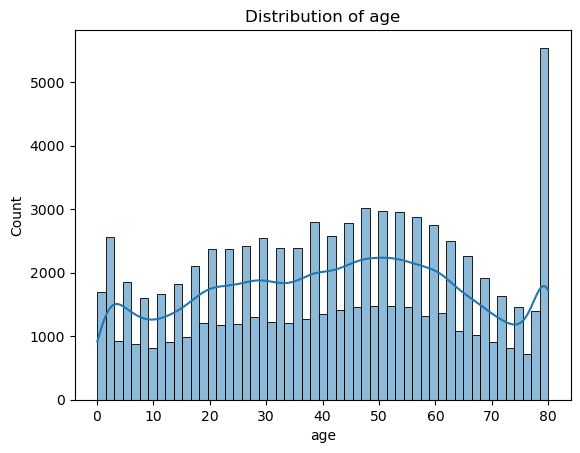

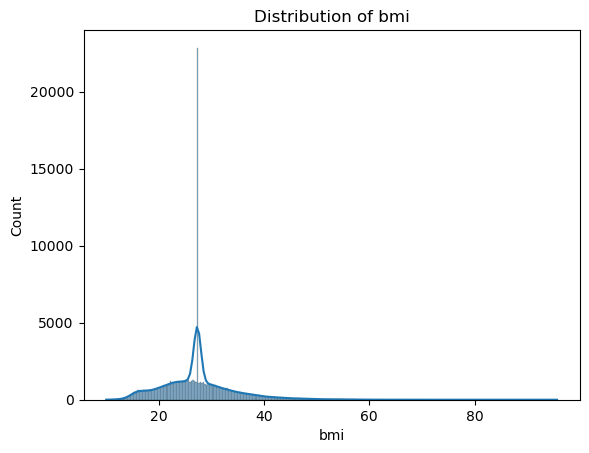

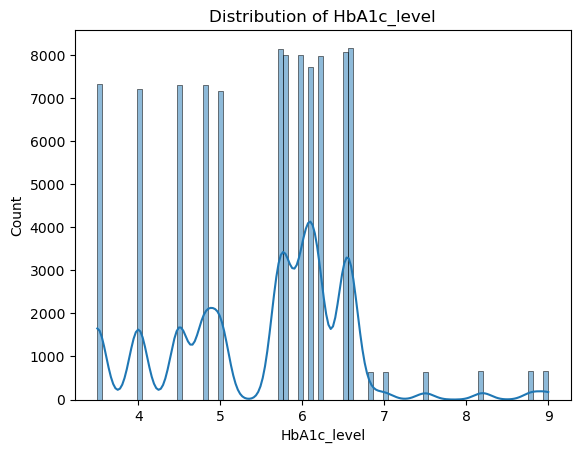

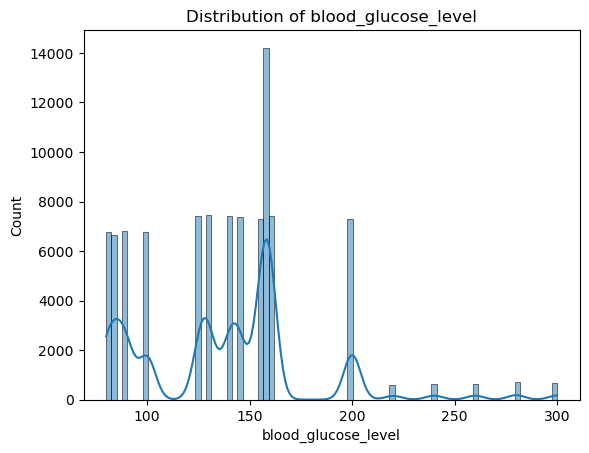

In [21]:
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for col in cols:
    sns.histplot(df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

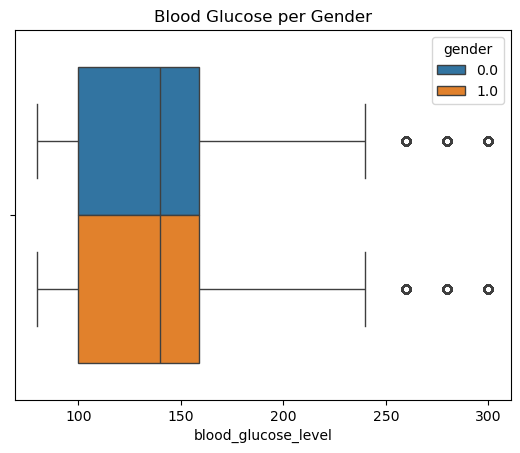

In [22]:
sns.boxplot(data=df, x='blood_glucose_level', hue='gender')
plt.title('Blood Glucose per Gender')
plt.show()

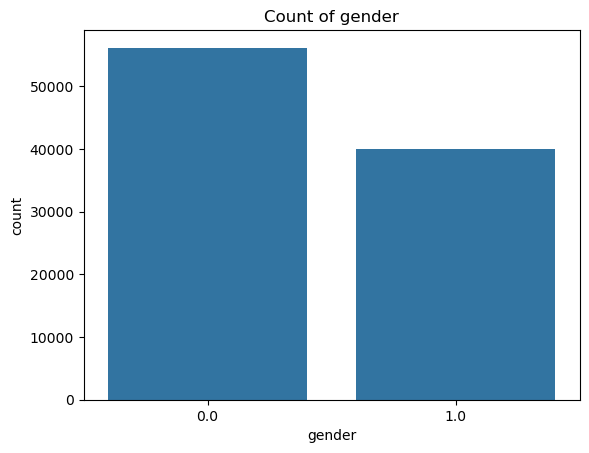

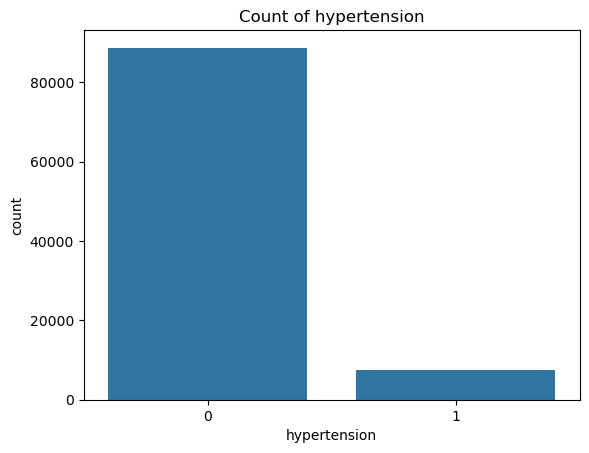

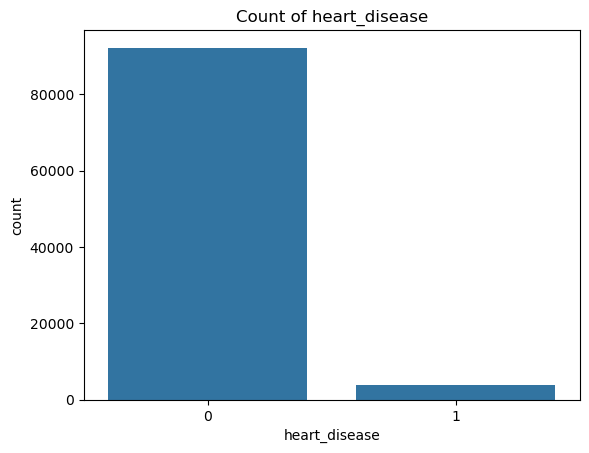

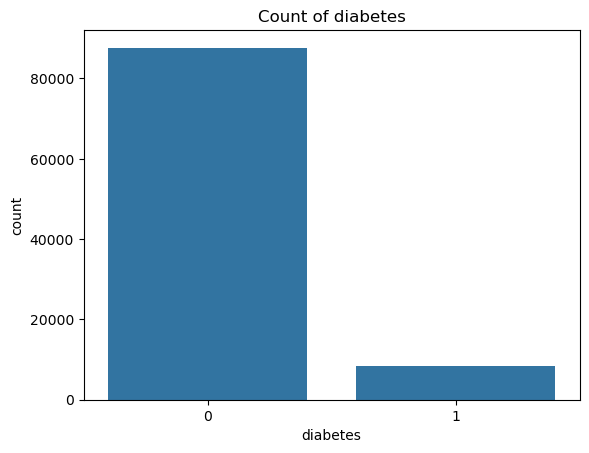

In [24]:
cols = ['gender', 'hypertension', 'heart_disease', 'diabetes']

for col in cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.show()

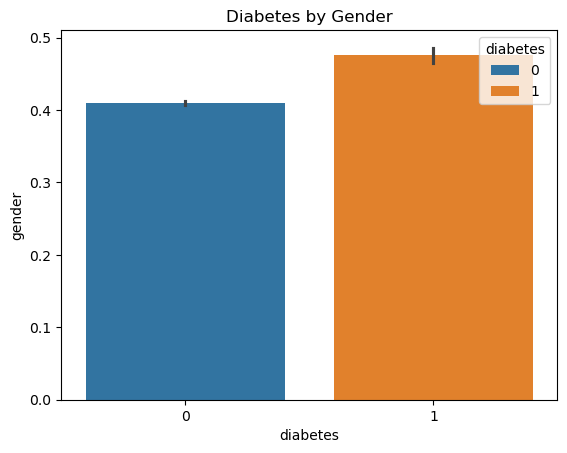

In [25]:
sns.barplot(data=df, x='diabetes', y='gender', hue='diabetes')
plt.title('Diabetes by Gender')
plt.show()

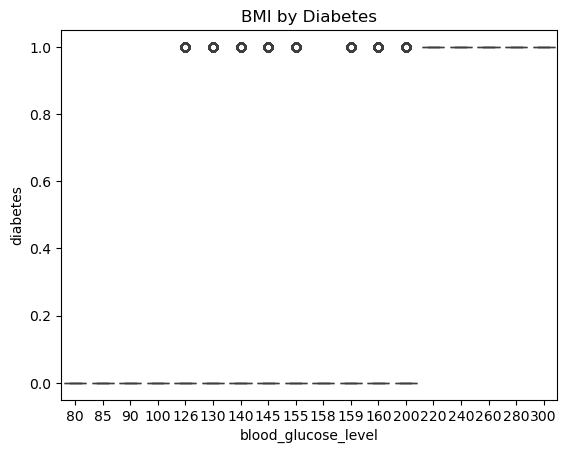

In [ ]:
sns.boxplot(x='HbA1c_level', hue='diabetes', data=df)
plt.title('BMI by Diabetes')
plt.show()

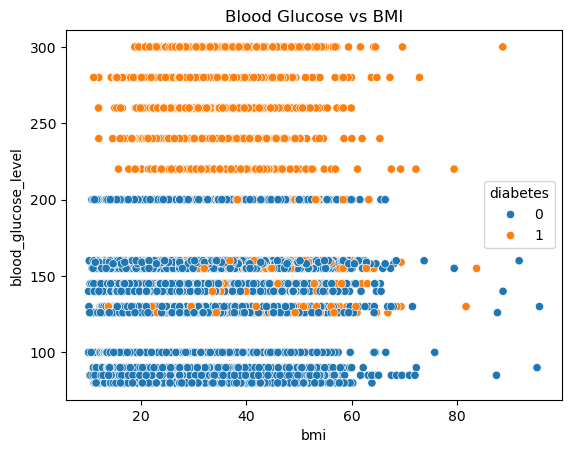

In [27]:
sns.scatterplot(x='bmi', y='blood_glucose_level', data=df, hue='diabetes')
plt.title('Blood Glucose vs BMI')
plt.show()

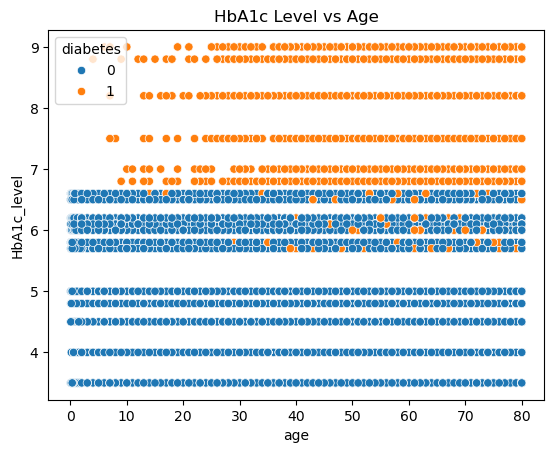

In [28]:
sns.scatterplot(x='age', y='HbA1c_level', data=df, hue='diabetes')
plt.title('HbA1c Level vs Age')
plt.show()

In [30]:
# sns.scatterplot(x='age', y='HbA1c_level', data=df, hue='smoking_history')
# plt.title('HbA1c Level vs Age')
# plt.show()

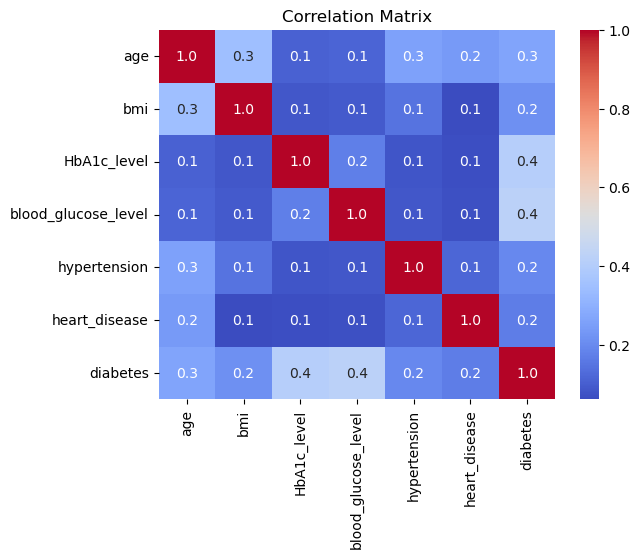

In [31]:
df2 = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'diabetes']]
sns.heatmap(df2.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
sns.pairplot(df2, hue='diabetes')
plt.show()

KeyboardInterrupt: 